In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install hdf5storage

In [0]:
import hdf5storage
import numpy as np

root_path = 'drive/My Drive/DeepLearning/newdataset/'

def LoadData(root_path):
  h5x_test = hdf5storage.loadmat(root_path+'new_sat6test.mat')
  h5x_train = hdf5storage.loadmat(root_path+'new_sat6train.mat')
  h5y_test = hdf5storage.loadmat(root_path+'new_test_label.mat')
  h5y_train = hdf5storage.loadmat(root_path+'new_train_label.mat')
  x_test = h5x_test.get('new_sat_test')
  x_train = h5x_train.get('new_sat_train')
  y_test = h5y_test.get('new_test_label')
  y_train = h5y_train.get('new_train_label')

  x_train=x_train.swapaxes(2,3)
  x_train=x_train.swapaxes(1,2)
  x_train=x_train.swapaxes(0,1)
  x_test=x_test.swapaxes(2,3)
  x_test=x_test.swapaxes(1,2)
  x_test=x_test.swapaxes(0,1)

  y_train=y_train.swapaxes(0,1)
  y_test=y_test.swapaxes(0,1)
  return  (x_train,y_train,x_test,y_test)

In [0]:
import tensorflow.keras as keras

(x_train,y_train,x_test,y_test) = LoadData(root_path)

In [0]:
x_train = np.divide(x_train,255.0,dtype=np.float16)
x_test = np.divide(x_test,255.0,dtype=np.float16)

In [0]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((301574, 28, 28, 4), (301574, 6), (75409, 28, 28, 4), (75409, 6))

In [0]:
optimizer = LeNet5(x_train,y_train,x_test,y_test)
#hyperparameters
lr=0.1
decay=1e-6
momentum=0.9
batch_size=96
epochs=12

optimizer.train(lr,decay,momentum,batch_size,epochs)

Training on  301574 samples with SGD
learning rate: 0.1 ,weight_decay: 1e-06 ,momentum: 0.9 ,batch_size: 96
Epoch 1/12
301574/301574 [==============================] - 83s 276us/step - loss: 0.6128 - accuracy: 0.7631
Epoch 2/12
301574/301574 [==============================] - 83s 274us/step - loss: 0.2768 - accuracy: 0.9063
Epoch 3/12
301574/301574 [==============================] - 81s 270us/step - loss: 0.2242 - accuracy: 0.9249
Epoch 4/12
301574/301574 [==============================] - 81s 270us/step - loss: 0.1963 - accuracy: 0.9345
Epoch 5/12
301574/301574 [==============================] - 83s 276us/step - loss: 0.1807 - accuracy: 0.9393
Epoch 6/12
301574/301574 [==============================] - 82s 273us/step - loss: 0.1715 - accuracy: 0.9422
Epoch 7/12
301574/301574 [==============================] - 83s 275us/step - loss: 0.1610 - accuracy: 0.9450
Epoch 8/12
301574/301574 [==============================] - 82s 273us/step - loss: 0.1544 - accuracy: 0.9477
Epoch 9/12
301574/30

Test on 75409 samples
75409/75409 [==============================] - 27s 359us/step
Test loss: 0.13412629089683697
Test accuracy: 0.9547799229621887
Don't use as a metric - Original Training Dataset Accuracy: 95.331%
Test Dataset Accuracy: 95.478%


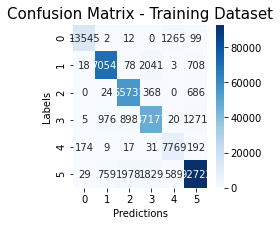

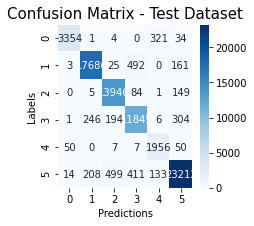

In [0]:
optimizer.test()

In [0]:
import tensorflow as tf
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.38.52.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.38.52.138:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [0]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
with tf.device('/TPU:0'):
  c = tf.matmul(a, b)
print("c device: ", c.device)
print(c)

c device:  /job:worker/replica:0/task:0/device:TPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [0]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

class LeNet5:
  def __init__(self,x_train,y_train,x_test,y_test):
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    pass
  
  def train(self,Lr=0.01, Decay=1e-6, Momentum=0.9,batch_size=128, epochs=12):
    # output type
    # output images are 28*28 pixels in grey scale
    num_classes = 6
    img_rows, img_cols = 28, 28

    x_train = self.x_train
    x_test = self.x_test
    input_shape = (img_rows, img_cols, 4)

    # Convert data type into float32
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    print('Training on ',x_train.shape[0], 'samples with SGD')
    print('learning rate:',Lr,',weight_decay:',Decay,',momentum:',Momentum,',batch_size:',batch_size)
    # turn categories 0-9 into binary, convenient for training purpose
    y_train = self.y_train
    y_test = self.y_test
    # use a sequential model
    self.model = Sequential()

    # add a 2D convolutional layer with 6 filters (i.e. convolutional channels), activation function is 'relu', padding is valid, kernal is 5*5 pixels window
    # add a max pooling layer with size 2*2
    # add a 2D convolutional layer with 16 filters (i.e. convolutional channels), activation function is 'relu', padding is valid, kernal is 5*5 pixels window
    # add a max pooling layer with size 2*2
    self.model.add(Conv2D(filters=6,activation='relu', input_shape=input_shape,padding='valid',kernel_size=(5,5)))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Conv2D(filters=16, activation='relu',padding='valid',kernel_size=(5,5)))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))

    # add a Flatten layer
    # flatten layer converts the pooled feature map to a single column, passed to the fully connected layer. Flatten won't affect the batch size
    # add a fully connected layer with an output dimension of 120
    self.model.add(Flatten())
    self.model.add(Dense(50, activation='relu'))
    self.model.add(Dense(num_classes, activation='softmax'))

    
    sgd = optimizers.SGD(lr=Lr, decay=Decay, momentum=Momentum, nesterov=True)
    self.model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    self.model.fit(x_train, y_train, batch_size, epochs, verbose=1, shuffle=True)  

  def test(self):
    x_train=self.x_train
    y_train=self.y_train
    x_test=self.x_test
    y_test=self.y_test
    print('Test on',self.x_test.shape[0], 'samples')
    score = self.model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_train_pred = self.model.predict(x_train)  # predict the whole training dataset
    # calculate the accuracy over the whole dataset and get information about falses
    train_accuracy, (true_labels, pred_labels) = self.calculate_performance(y_train, y_train_pred)

    print(f'Don\'t use as a metric - Original Training Dataset Accuracy: {np.round(train_accuracy*100, 3)}%')

    plt.figure(figsize=(3, 3))

    # Calculate the confusion matrix and visualize it
    train_matrix = confusion_matrix(y_pred=pred_labels, y_true=true_labels)
    sns.heatmap(data=train_matrix, annot=True, cmap='Blues', fmt=f'.0f')

    plt.title('Confusion Matrix - Training Dataset', size=15)
    plt.xlabel('Predictions', size=10);
    plt.ylabel('Labels', size=10);

    y_test_pred = self.model.predict(x_test)  # predict the whole test dataset

    # calculate the accuracy over the whole dataset and get information about falses
    test_accuracy, (true_labels, pred_labels) = self.calculate_performance(y_test, y_test_pred,)

    print(f'Test Dataset Accuracy: {np.round(test_accuracy*100, 3)}%')

    plt.figure(figsize=(3, 3))

    # Calculate the confusion matrix and visualize it
    test_matrix = confusion_matrix(y_pred=pred_labels, y_true=true_labels)
    sns.heatmap(data=test_matrix, annot=True, cmap='Blues', fmt=f'.0f')

    plt.title('Confusion Matrix - Test Dataset', size=15)
    plt.xlabel('Predictions', size=10);
    plt.ylabel('Labels', size=10);

  def calculate_performance(self, labels, pred):
    pred_cat = np.argmax(pred, axis=1)  # categorical predictions 0-9
    labels_cat = np.argmax(labels, axis=1)  # categorical labels 0-9
    
    # a boolean vector of element-wise comparison between prediction and label
    corrects = (pred_cat == labels_cat)
    
    # get the falses data
    falses_labels = labels_cat[~corrects]  # true labels of the falsely classified images - categorical
    falses_preds = pred[~corrects]  # the false predictions of the images - 10-dim prediction
     
    examples_num = labels.shape[0]  # total numbers of examples
    accuracy = np.count_nonzero(corrects) / examples_num

    return accuracy, [labels_cat, pred_cat]

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
